# Correlation Testing
Variables used: hospital and icu admissions

In [1]:
# import libraries
import pandas as pd

## Load and filter the datasets by date

In [2]:
# Load the datasets
hosp_df = pd.read_csv('filtered_datasets/hospital.csv')
icu_df = pd.read_csv('filtered_datasets/icu.csv')

# Parse the date column
hosp_df['date'] = pd.to_datetime(hosp_df['date'])
icu_df['date'] = pd.to_datetime(icu_df['date'])

# Filter the dataset for a specific period where cases and vaccination are booming
start_date = '2021-02-26'
end_date = '2021-06-30'
hosp_df = hosp_df[(hosp_df['date'] >= start_date) & (hosp_df['date'] <= end_date)]
icu_df = icu_df[(icu_df['date'] >= start_date) & (icu_df['date'] <= end_date)]

# Group the data by date and sum the cases for each date
icu_df = icu_df.groupby('date')[['icu_covid', 'icu_pui', 'icu_noncovid']].sum().reset_index() #group all icu cases 
hosp_df = hosp_df.groupby('date').sum()['admitted_total'].reset_index()

# Combine ICU columns into one column
icu_df['icu_total'] = icu_df['icu_covid'] + icu_df['icu_pui'] + icu_df['icu_noncovid']

# Merge the two datasets
merged_df = pd.merge(hosp_df, icu_df, on='date')

merged_df.head()

,date,admitted_total,icu_covid,icu_pui,icu_noncovid,icu_total
0,2021-02-26,955,255,7,421,683
1,2021-02-27,728,257,7,398,662
2,2021-02-28,728,258,7,397,662
3,2021-03-01,652,248,10,405,663
4,2021-03-02,753,251,8,419,678


## Calculate the Pearson correlation coefficient

In [3]:
correlation = merged_df['admitted_total'].corr(merged_df['icu_total'])
print(f'Pearson correlation between hospital addmisions and ICU admissions: {correlation}')

Pearson correlation between hospital addmisions and ICU admissions: 0.9197923862865145


## Scatter plot for correlation


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

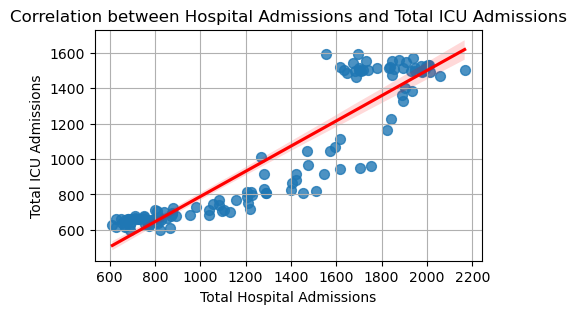

In [5]:
# Create a scatter plot with a regression line
plt.figure(figsize=(5, 3))
sns.regplot(x='admitted_total', y='icu_total', data=merged_df, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Set the title and labels
plt.title('Correlation between Hospital Admissions and Total ICU Admissions')
plt.xlabel('Total Hospital Admissions')
plt.ylabel('Total ICU Admissions')
plt.grid(True)
plt.show()